### 데이터 로드 및 전처리

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl

In [479]:
df = pd.read_csv('./archive/retail_store_inventory.csv')
df.head(3)

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer


In [480]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

In [482]:
df.loc[(df['Store ID'] == 'S001')&(df['Product ID'] == 'P0001')&(df['Category'] == 'Groceries')]

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
100,2022-01-02,S001,P0001,Groceries,West,116,81,104,92.94,27.95,10,Cloudy,0,30.89,Spring
300,2022-01-04,S001,P0001,Groceries,South,85,58,193,52.87,77.88,15,Cloudy,1,75.99,Winter
400,2022-01-05,S001,P0001,Groceries,South,238,147,37,150.27,28.46,20,Sunny,1,29.40,Winter
1400,2022-01-15,S001,P0001,Groceries,North,290,176,94,170.06,98.04,10,Rainy,1,98.20,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70100,2023-12-03,S001,P0001,Groceries,South,482,122,81,128.17,21.92,0,Sunny,0,21.88,Spring
70600,2023-12-08,S001,P0001,Groceries,East,383,263,20,273.73,93.77,10,Rainy,1,94.58,Spring
71500,2023-12-17,S001,P0001,Groceries,North,307,55,185,66.58,58.65,20,Cloudy,0,54.37,Summer
72400,2023-12-26,S001,P0001,Groceries,West,372,46,177,61.65,18.23,5,Cloudy,0,19.26,Autumn


In [483]:
df['Date'] = pd.to_datetime(df['Date'])

In [484]:
df['Weekday'] = df['Date'].dt.day_name()
df

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,Weekday
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn,Saturday
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn,Saturday
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer,Saturday
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn,Saturday
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73095,2024-01-01,S005,P0016,Furniture,East,96,8,127,18.46,73.73,20,Snowy,0,72.45,Winter,Monday
73096,2024-01-01,S005,P0017,Toys,North,313,51,101,48.43,82.57,10,Cloudy,0,83.78,Autumn,Monday
73097,2024-01-01,S005,P0018,Clothing,West,278,36,151,39.65,11.11,10,Rainy,0,10.91,Winter,Monday
73098,2024-01-01,S005,P0019,Toys,East,374,264,21,270.52,53.14,20,Rainy,0,55.80,Spring,Monday


- 계절 특성 추가

In [485]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# 계절 매핑 함수 정의
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'   # 봄
    elif month in [6, 7, 8]:
        return 'Summer'   # 여름
    elif month in [9, 10, 11]:
        return 'Autumn'   # 가을
    else:
        return 'Winter'   # 겨울 (12, 1, 2)

# 계절 컬럼 추가
df['Season'] = df['Month'].apply(get_season)

- 할인된 판매 금액 컬럼 추가

In [486]:
df['Sale Price'] = df['Price']*(1 - df['Discount']/100)
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,...,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,Weekday,Year,Month,Day,Season,Sale Price
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,...,Rainy,0,29.69,Autumn,Saturday,2022,1,1,Winter,26.800
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,...,Sunny,0,66.16,Autumn,Saturday,2022,1,1,Winter,50.408
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,...,Sunny,1,31.32,Summer,Saturday,2022,1,1,Winter,25.191
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,...,Cloudy,1,34.74,Autumn,Saturday,2022,1,1,Winter,29.448
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,...,Sunny,0,68.95,Summer,Saturday,2022,1,1,Winter,73.640


- 각 제품을 나눌 product id, category 항목을 합친 컬럼 추가. (product id가 모든 카테고리에 동일함.)

In [487]:
df['Product Classification'] = df['Category'] + "_" + df['Product ID'].astype(str)
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,...,Holiday/Promotion,Competitor Pricing,Seasonality,Weekday,Year,Month,Day,Season,Sale Price,Product Classification
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,...,0,29.69,Autumn,Saturday,2022,1,1,Winter,26.800,Groceries_P0001
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,...,0,66.16,Autumn,Saturday,2022,1,1,Winter,50.408,Toys_P0002
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,...,1,31.32,Summer,Saturday,2022,1,1,Winter,25.191,Toys_P0003
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,...,1,34.74,Autumn,Saturday,2022,1,1,Winter,29.448,Toys_P0004
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,...,0,68.95,Summer,Saturday,2022,1,1,Winter,73.640,Electronics_P0005


In [488]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    73100 non-null  datetime64[ns]
 1   Store ID                73100 non-null  object        
 2   Product ID              73100 non-null  object        
 3   Category                73100 non-null  object        
 4   Region                  73100 non-null  object        
 5   Inventory Level         73100 non-null  int64         
 6   Units Sold              73100 non-null  int64         
 7   Units Ordered           73100 non-null  int64         
 8   Demand Forecast         73100 non-null  float64       
 9   Price                   73100 non-null  float64       
 10  Discount                73100 non-null  int64         
 11  Weather Condition       73100 non-null  object        
 12  Holiday/Promotion       73100 non-null  int64 

#### EDA
0) 전반적인 판매량 추이 파악
1) 가격과 판매량 관계 탐색
2) 할인율 효과 분석
3) 경쟁사 가격 효과
4) 시즌성 및 기타 다른 요인과의 관계성

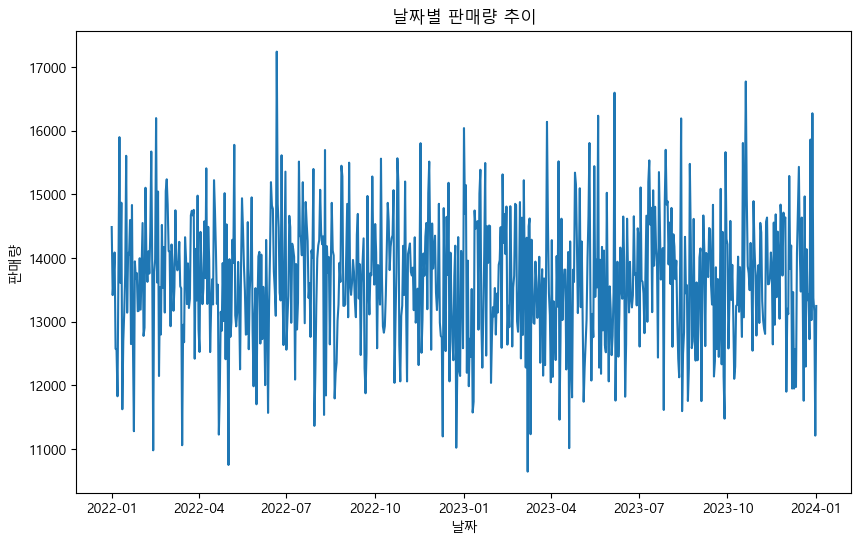

In [489]:
# 한글 폰트 설정
mpl.rc('font', family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False

# 날짜별 판매량
daily_sales = df.groupby('Date')['Units Sold'].sum().reset_index()

plt.figure(figsize=(10,6))
plt.plot(daily_sales['Date'], daily_sales['Units Sold'])
plt.title('날짜별 판매량 추이')
plt.xlabel('날짜')
plt.ylabel('판매량')
plt.show()

In [490]:
filtered_list = []

for r in df['Date'].unique():
    temp_df = df[df['Date'] == r]
    Q1 = temp_df['Units Sold'].quantile(0.25)
    Q3 = temp_df['Units Sold'].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

     # 이상치 제거
    filtered = temp_df[(temp_df['Units Sold'] >= lower_bound) & (temp_df['Units Sold'] <= upper_bound)]
    filtered_list.append(filtered)

df = pd.concat(filtered_list, ignore_index=True)

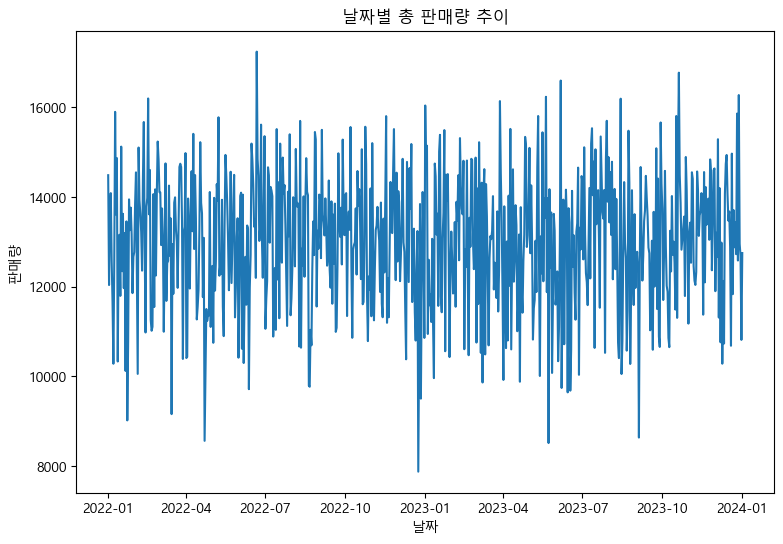

In [491]:
# 날짜별 판매량
daily_sales = df.groupby('Date')['Units Sold'].sum().reset_index()

plt.figure(figsize=(9,6))
plt.plot(daily_sales['Date'], daily_sales['Units Sold'])
plt.title('날짜별 총 판매량 추이')
plt.xlabel('날짜')
plt.ylabel('판매량')
plt.show()

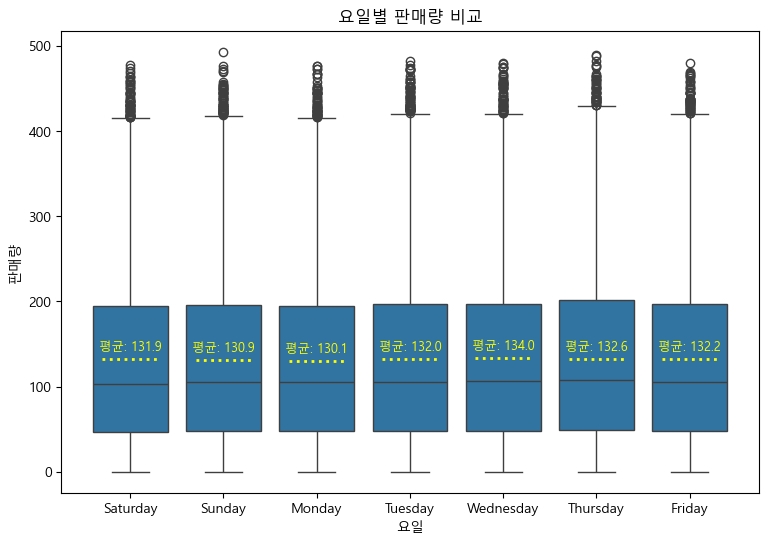

In [492]:
# 요일별 판매량
plt.figure(figsize=(9,6))
sns.boxplot(data=df, x=df['Weekday'], y=df['Units Sold'])

# 요일별 평균 계산
weekday_means = df.groupby('Weekday')['Units Sold'].mean()

# 그래프에 텍스트로 표시
for i, mean in enumerate(weekday_means):
    plt.text(i, mean + 10, f'평균: {mean:.1f}', color='yellow', ha='center', fontsize=9)
    plt.hlines(y=mean, xmin=i-0.3, xmax=i+0.3, colors='yellow', linestyles='dotted', linewidth=2)

plt.title('요일별 판매량 비교')
plt.xlabel('요일')
plt.ylabel('판매량')
plt.show()

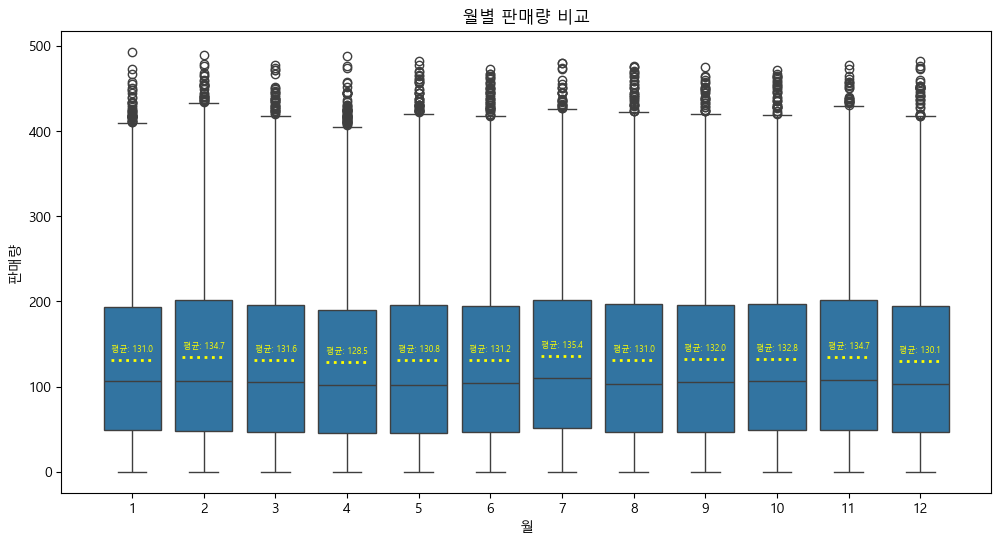

In [493]:
# 월별 판매량
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x=df['Month'], y=df['Units Sold'])

# 요일별 평균 계산
weekday_means = df.groupby('Month')['Units Sold'].mean()

# 그래프에 텍스트로 표시
for i, mean in enumerate(weekday_means):
    plt.text(i, mean + 10, f'평균: {mean:.1f}', color='yellow', ha='center', fontsize=6)
    plt.hlines(y=mean, xmin=i-0.3, xmax=i+0.3, colors='yellow', linestyles='dotted', linewidth=2)

plt.title('월별 판매량 비교')
plt.xlabel('월')
plt.ylabel('판매량')
plt.show()

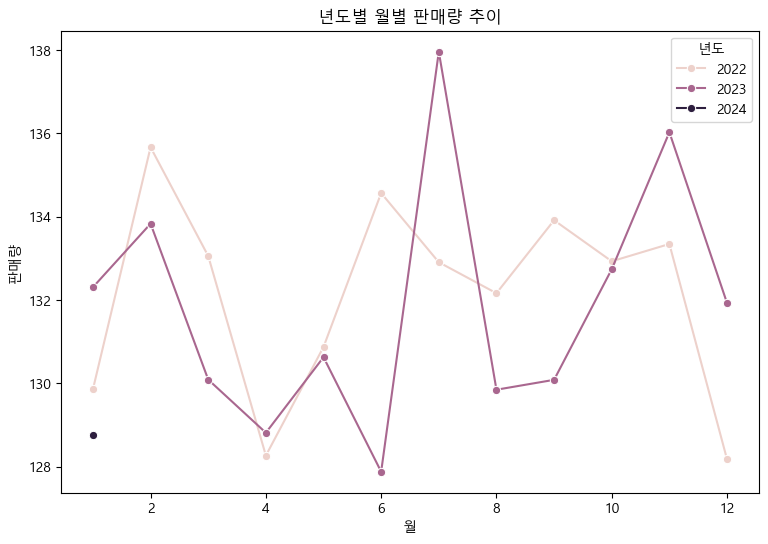

In [494]:
monthly_sales = df.groupby(['Year','Month'])['Units Sold'].mean().reset_index()

plt.figure(figsize=(9,6))
sns.lineplot(data=monthly_sales, x='Month', y='Units Sold', hue='Year', marker='o')
plt.title('년도별 월별 판매량 추이')
plt.xlabel('월')
plt.ylabel('판매량')
plt.legend(title='년도')
plt.show()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_26672\702804222.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Category', y='Units Sold', estimator='mean', palette='Set2')


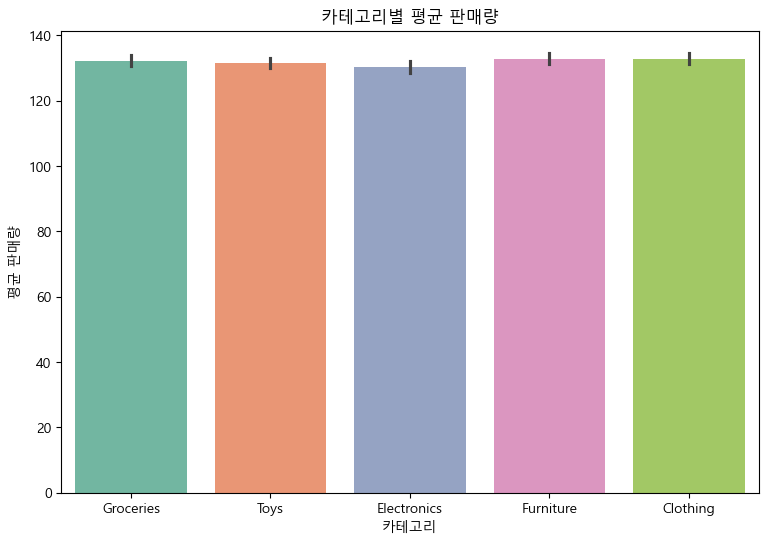

In [495]:
plt.figure(figsize=(9,6))
sns.barplot(data=df, x='Category', y='Units Sold', estimator='mean', palette='Set2')
plt.title('카테고리별 평균 판매량')
plt.xlabel('카테고리')
plt.ylabel('평균 판매량')
plt.show()

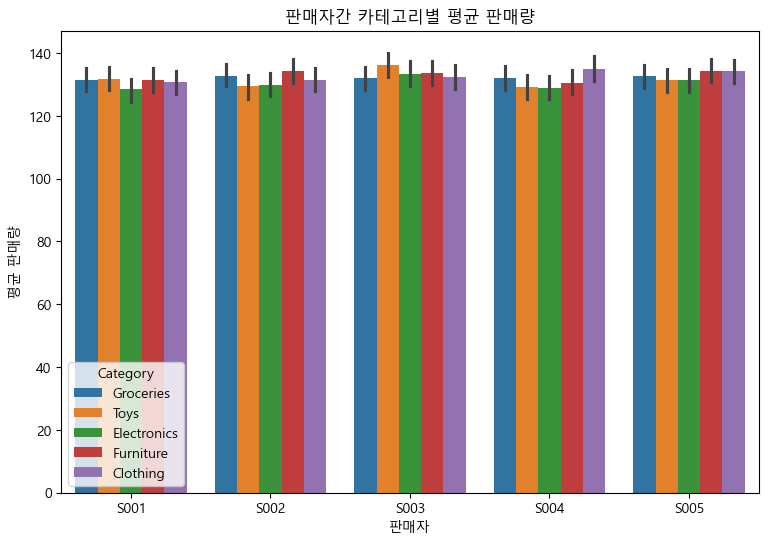

In [497]:
plt.figure(figsize=(9,6))
sns.barplot(data=df, x='Store ID', y='Units Sold', estimator='mean', hue='Category')
plt.title('판매자간 카테고리별 평균 판매량')
plt.xlabel('판매자')
plt.ylabel('평균 판매량')
plt.show()

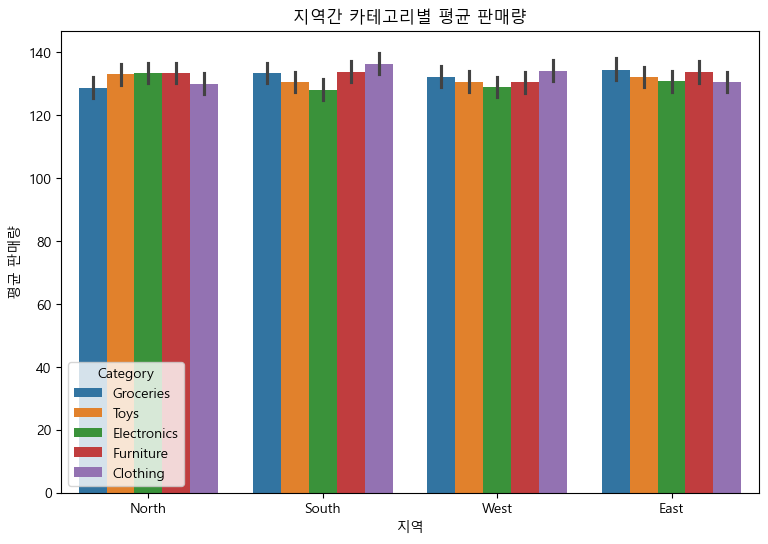

In [496]:
plt.figure(figsize=(9,6))
sns.barplot(data=df, x='Region', y='Units Sold', estimator='mean', hue='Category')
plt.title('지역간 카테고리별 평균 판매량')
plt.xlabel('지역')
plt.ylabel('평균 판매량')
plt.show()

In [214]:
len(df[df['Units Sold'] < 200])/72000

0.7555

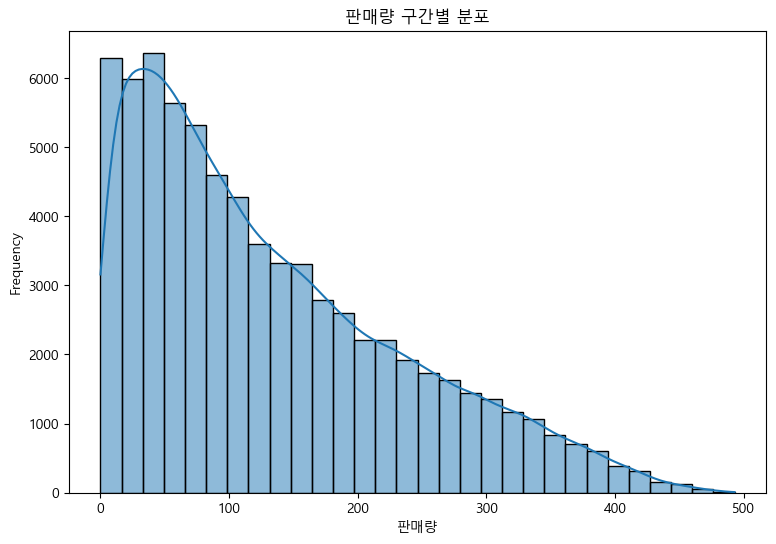

In [498]:
plt.figure(figsize=(9,6))
sns.histplot(df['Units Sold'], kde=True, bins=30) # edgecolor=True/None
plt.title('판매량 구간별 분포')
plt.xlabel('판매량')
plt.ylabel('Frequency')
plt.show()

- 타겟으로하는 판매량의 분포가 200 이하 값에 지나치게 밀집되어있어 추후 모델 예측값이 해당 범위로만 머무를 수 있다.
- 이를 해결하기 위해 로그 변환

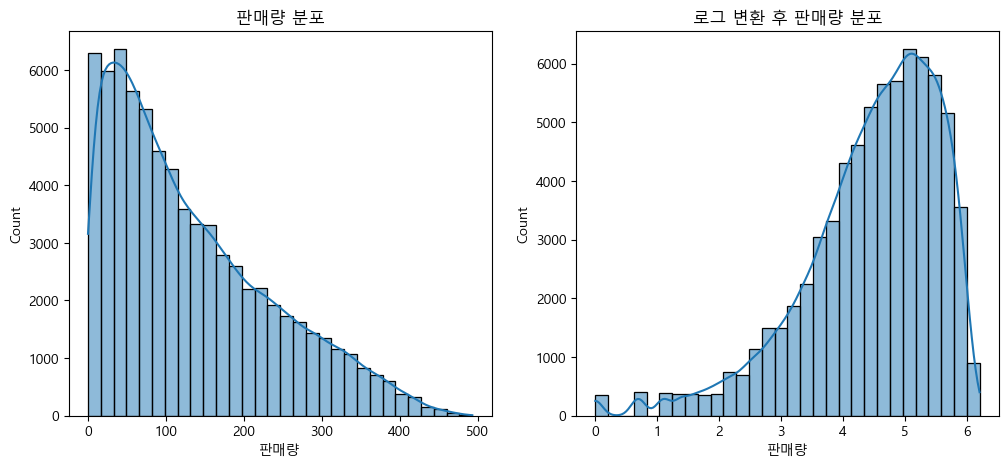

In [499]:
plt.figure(figsize=(12,5))

# 원본 분포
plt.subplot(1,2,1)
sns.histplot(df['Units Sold'], bins=30, kde=True)
plt.xlabel('판매량')
plt.title('판매량 분포')

# 로그 변환 후 분포
plt.subplot(1,2,2)
sns.histplot(np.log1p(df['Units Sold']), bins=30, kde=True)
plt.xlabel('판매량')
plt.title('로그 변환 후 판매량 분포')

plt.show()

In [500]:
len(df[np.log1p(df['Units Sold']) <=2])

2610

#### 1) 가격과 판매량 관계 탐색
- 낮은 가격대에서 판매가 더 많이 발생할 것이라는 가설과 달리 높은 가격대에서도 일정한 판매량을 보임
- 전자기기는 높은 금액에서 판매량이 급격히 떨어지는 것으로 보아 가격 민감도가 높은 품목
- 가구나 악세서리는 고가에서도 판매량이 증가하는 것으로 보아 브랜드나 제품의 특성의 영향을 많이 받을 것으로 판단됨.
- 대부분의 상품은 가격 변화에 크게 민감하지 않고, 일부 고가 제품(Electronics)만 가격에 따라 판매량이 변한다. 따라서 가격 최적화 전략을 세울 때 카테고리와 제품 특성을 반드시 고려할 필요가 있음.

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_26672\4054893194.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_sales = temp_df.groupby(["Category", "sale_price_bin"])["Units Sold"].mean().reset_index()


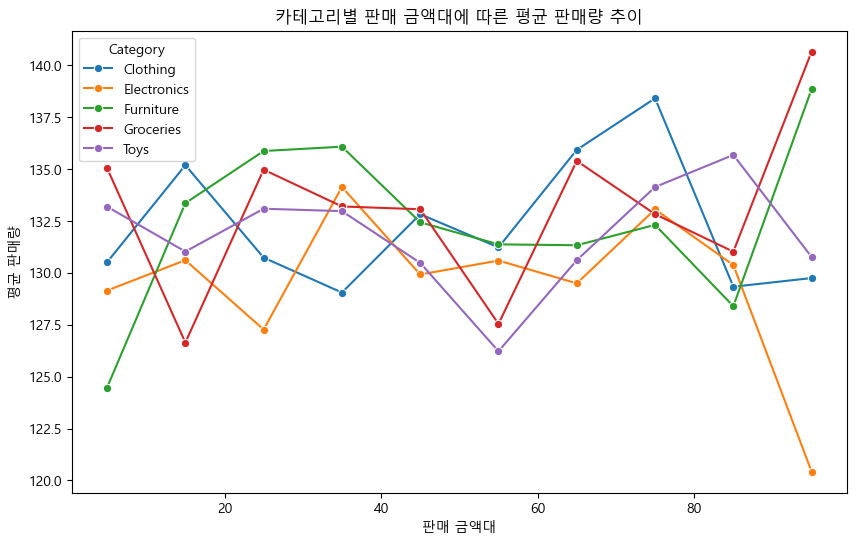

In [501]:
temp_df = df.copy()
temp_df["sale_price_bin"] = pd.cut(temp_df["Sale Price"], bins=range(0, int(temp_df["Sale Price"].max())+10, 10))
avg_sales = temp_df.groupby(["Category", "sale_price_bin"])["Units Sold"].mean().reset_index()

# 구간의 중앙값을 새로운 컬럼으로 만들어서 숫자화
avg_sales["sale_price_mid"] = avg_sales["sale_price_bin"].apply(lambda x: x.mid)
avg_sales['Units Sold'] = avg_sales['Units Sold'].fillna(0)

plt.figure(figsize=(10,6))
sns.lineplot(data=avg_sales, x="sale_price_mid", y="Units Sold", hue="Category", marker="o")
plt.title("카테고리별 판매 금액대에 따른 평균 판매량 추이")
plt.xlabel('판매 금액대')
plt.ylabel('평균 판매량')
plt.show()

In [502]:
temp_df["Category"]

0          Groceries
1               Toys
2               Toys
3               Toys
4        Electronics
            ...     
71970      Furniture
71971           Toys
71972       Clothing
71973           Toys
71974      Groceries
Name: Category, Length: 71975, dtype: object

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_26672\1428865812.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_sales = temp_df.loc[temp_df["Category"]=='Electronics'].groupby(["Product Classification", "sale_price_bin"])["Units Sold"].mean().reset_index()


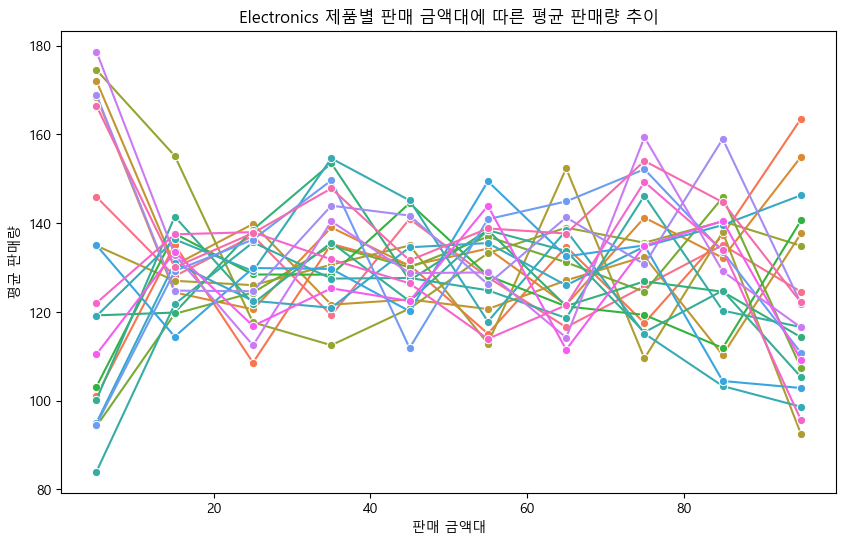

In [507]:
temp_df = df.copy()
temp_df["sale_price_bin"] = pd.cut(temp_df["Sale Price"], bins=range(0, int(temp_df["Sale Price"].max())+10, 10))
avg_sales = temp_df.loc[temp_df["Category"]=='Electronics'].groupby(["Product Classification", "sale_price_bin"])["Units Sold"].mean().reset_index()

# 구간의 중앙값을 새로운 컬럼으로 만들어서 숫자화
avg_sales["sale_price_mid"] = avg_sales["sale_price_bin"].apply(lambda x: x.mid)
avg_sales['Units Sold'] = avg_sales['Units Sold'].fillna(0)

plt.figure(figsize=(10,6))
sns.lineplot(data=avg_sales, x="sale_price_mid", y="Units Sold", hue='Product Classification', marker="o")
# 범례 제거
plt.legend().remove()
plt.title("Electronics 제품별 판매 금액대에 따른 평균 판매량 추이")
plt.xlabel('판매 금액대')
plt.ylabel('평균 판매량')
plt.show()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_26672\1882285323.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_sales = temp_df.loc[temp_df["Category"]=='Toys'].groupby(["Product Classification", "sale_price_bin"])["Units Sold"].mean().reset_index()


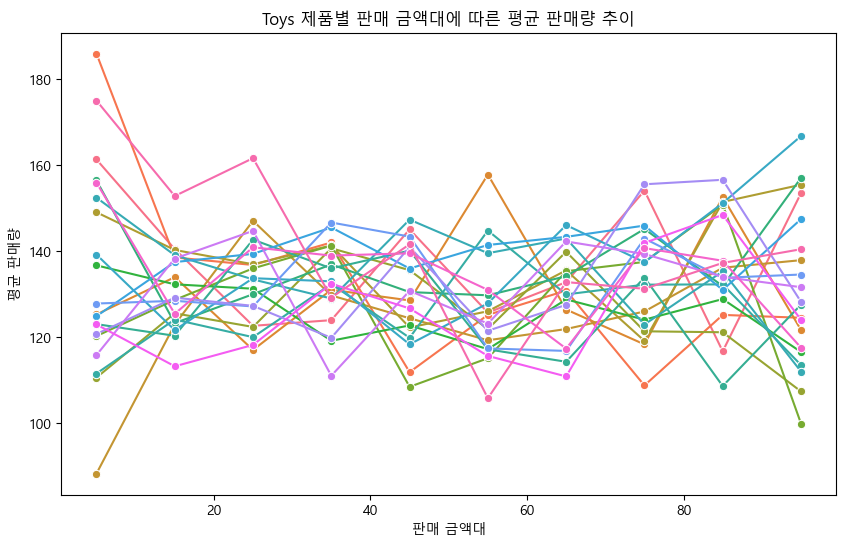

In [504]:
temp_df = df.copy()
temp_df["sale_price_bin"] = pd.cut(temp_df["Sale Price"], bins=range(0, int(temp_df["Sale Price"].max())+10, 10))
avg_sales = temp_df.loc[temp_df["Category"]=='Toys'].groupby(["Product Classification", "sale_price_bin"])["Units Sold"].mean().reset_index()

# 구간의 중앙값을 새로운 컬럼으로 만들어서 숫자화
avg_sales["sale_price_mid"] = avg_sales["sale_price_bin"].apply(lambda x: x.mid)
avg_sales['Units Sold'] = avg_sales['Units Sold'].fillna(0)

plt.figure(figsize=(10,6))
sns.lineplot(data=avg_sales, x="sale_price_mid", y="Units Sold", hue='Product Classification', marker="o")
# 범례 제거
plt.legend().remove()
plt.title("Toys 제품별 판매 금액대에 따른 평균 판매량 추이")
plt.xlabel('판매 금액대')
plt.ylabel('평균 판매량')
plt.show()

#### 2) 할인율 효과 분석
- 할인에 따른 판매량은 5% 이상에서 부터는 거의 일정하다.
- 전자제품의 할인 민감도가 가장 높다.
- 할인 변화에 따른 판매량 변화폭이 가장 큰 계절은 봄이다.

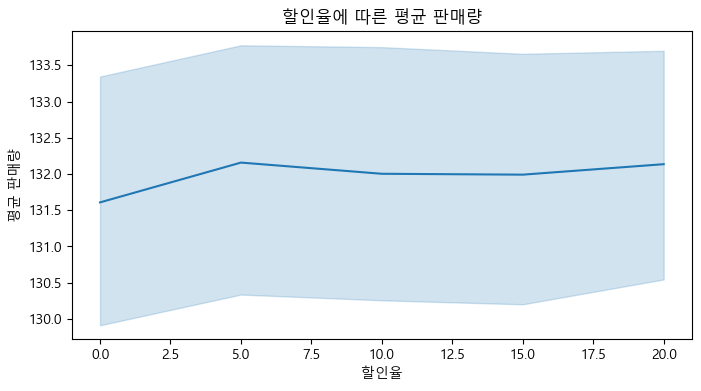

In [508]:
plt.figure(figsize=(8,4))
sns.lineplot(data = df, x='Discount', y='Units Sold')
plt.title('할인율에 따른 평균 판매량')
plt.xlabel('할인율')
plt.ylabel('평균 판매량')
plt.show()

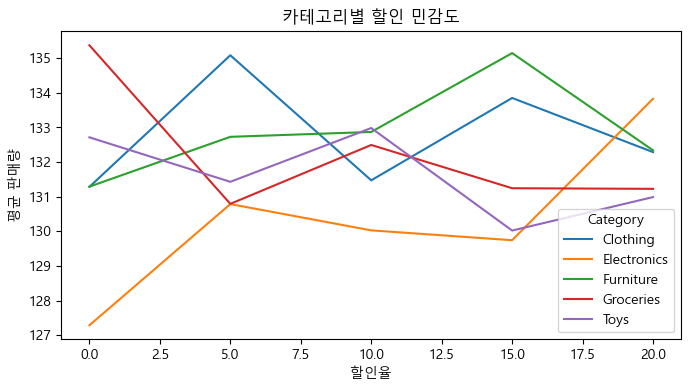

In [509]:
discount_sales = df.groupby(['Category', 'Discount'])['Units Sold'].mean().reset_index()
discount_sales

plt.figure(figsize=(8,4))
sns.lineplot(data = discount_sales, x='Discount', y='Units Sold', hue='Category')
plt.title('카테고리별 할인 민감도')
plt.xlabel('할인율')
plt.ylabel('평균 판매량')
plt.show()

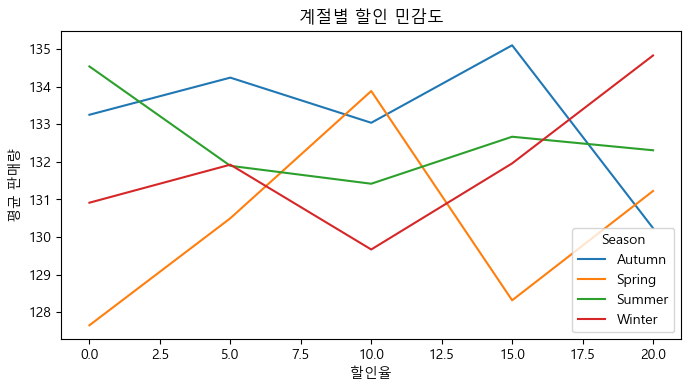

In [510]:
season_sales = df.groupby(['Season', 'Discount'])['Units Sold'].mean().reset_index()

plt.figure(figsize=(8,4))
sns.lineplot(data = season_sales, x='Discount', y='Units Sold', hue='Season')
plt.title('계절별 할인 민감도')
plt.xlabel('할인율')
plt.ylabel('평균 판매량')
plt.show()

#### 3) 경쟁사 가격 효과
- 경쟁사 대비 상대적 가격차이 범위가 40% 이내에서는 비교적 안정적인 판매량을 보인다.
- 하지만, 40% 이상 가격차이가 나는 범위에서는 판매량 변화의 폭이 크다.
- 또한, 상대적으로 비싼 금액에서 오히려 판매량이 증가하는 경향을 보이는 품목도 있기에 제품 특성에 따른 가격 최적화가 필요하다고 판단됨.


In [511]:
df.head(3)

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,...,Holiday/Promotion,Competitor Pricing,Seasonality,Weekday,Year,Month,Day,Season,Sale Price,Product Classification
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,...,0,29.69,Autumn,Saturday,2022,1,1,Winter,26.800,Groceries_P0001
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,...,0,66.16,Autumn,Saturday,2022,1,1,Winter,50.408,Toys_P0002
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,...,1,31.32,Summer,Saturday,2022,1,1,Winter,25.191,Toys_P0003


In [512]:
# 상대 가격변수 추가
temp_df = df.copy()
temp_df['relative_price'] = round((df['Sale Price'] - df['Competitor Pricing'])/df['Competitor Pricing'],2)
temp_df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,...,Competitor Pricing,Seasonality,Weekday,Year,Month,Day,Season,Sale Price,Product Classification,relative_price
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,...,29.69,Autumn,Saturday,2022,1,1,Winter,26.800,Groceries_P0001,-0.10
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,...,66.16,Autumn,Saturday,2022,1,1,Winter,50.408,Toys_P0002,-0.24
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,...,31.32,Summer,Saturday,2022,1,1,Winter,25.191,Toys_P0003,-0.20
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,...,34.74,Autumn,Saturday,2022,1,1,Winter,29.448,Toys_P0004,-0.15
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,...,68.95,Summer,Saturday,2022,1,1,Winter,73.640,Electronics_P0005,0.07


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_26672\2504272466.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_sales = temp_df.groupby(['rel_price_bin', 'Category'])['Units Sold'].mean().reset_index()


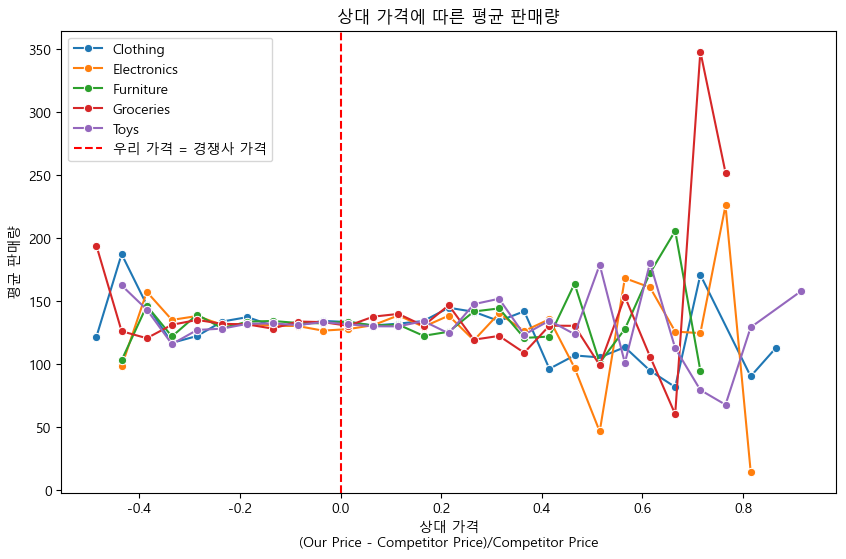

In [513]:
# relative_price 비율을 기반으로 구간 만들기
bins = np.arange(temp_df['relative_price'].min() - 0.05, 
                 temp_df['relative_price'].max() + 0.05, 
                 0.05)  # 5% 단위로 구간 생성

temp_df['rel_price_bin'] = pd.cut(temp_df['relative_price'], bins=bins)

# 구간별 평균 판매량 계산
avg_sales = temp_df.groupby(['rel_price_bin', 'Category'])['Units Sold'].mean().reset_index()

# 구간 중앙값으로 숫자화
avg_sales['rel_price_mid'] = avg_sales['rel_price_bin'].apply(lambda x: x.mid)

# 시각화
plt.figure(figsize=(10,6))
sns.lineplot(data=avg_sales, x='rel_price_mid', y='Units Sold', marker='o', hue='Category')
plt.axvline(0, color='red', linestyle='--', label='우리 가격 = 경쟁사 가격')
plt.xlabel('상대 가격\n(Our Price - Competitor Price)/Competitor Price')
plt.ylabel('평균 판매량')
plt.title('상대 가격에 따른 평균 판매량')
plt.legend()
plt.show()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_26672\256965226.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electronics_df['rel_price_bin'] = pd.cut(electronics_df['relative_price'], bins=bins)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_26672\256965226.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_sales = electronics_df.groupby(['rel_price_bin', 'Product ID'])['Units Sold'].mean().reset_index()


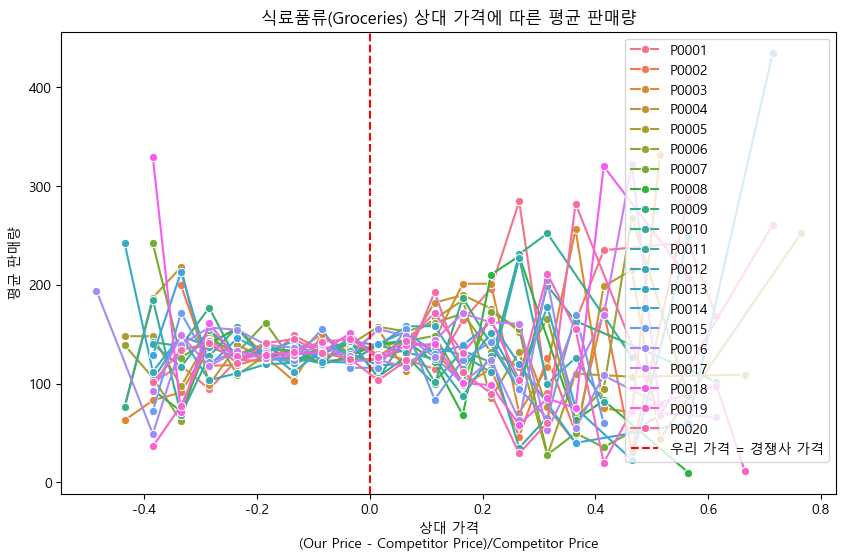

In [514]:
electronics_df = temp_df[temp_df['Category'] == 'Groceries']

# relative_price 비율을 기반으로 구간 만들기
bins = np.arange(electronics_df['relative_price'].min() - 0.05, 
                 electronics_df['relative_price'].max() + 0.05, 
                 0.05)  # 5% 단위로 구간 생성

electronics_df['rel_price_bin'] = pd.cut(electronics_df['relative_price'], bins=bins)

# 구간별 평균 판매량 계산
avg_sales = electronics_df.groupby(['rel_price_bin', 'Product ID'])['Units Sold'].mean().reset_index()

# 구간 중앙값으로 숫자화
avg_sales['rel_price_mid'] = avg_sales['rel_price_bin'].apply(lambda x: x.mid)

# 시각화
plt.figure(figsize=(10,6))
sns.lineplot(data=avg_sales, x='rel_price_mid', y='Units Sold', marker='o', hue='Product ID')
plt.axvline(0, color='red', linestyle='--', label='우리 가격 = 경쟁사 가격')
plt.xlabel('상대 가격\n(Our Price - Competitor Price)/Competitor Price')
plt.ylabel('평균 판매량')
plt.title('식료품류(Groceries) 상대 가격에 따른 평균 판매량')
plt.legend()
plt.show()


#### 4) 시즌성 및 기타 다른 요인과의 관계성
- 계절이나 휴일, 프로모션의 영향이 판매량과의 관계가 크지 않은 것으로 확인됨.

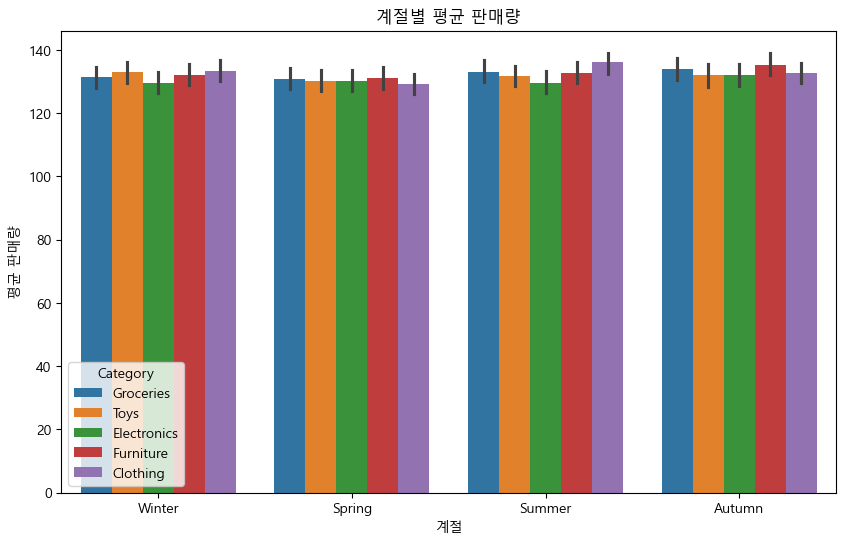

In [515]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Season', y='Units Sold', estimator='mean', hue='Category')
plt.title('계절별 평균 판매량')
plt.xlabel('계절')
plt.ylabel('평균 판매량')
plt.show()

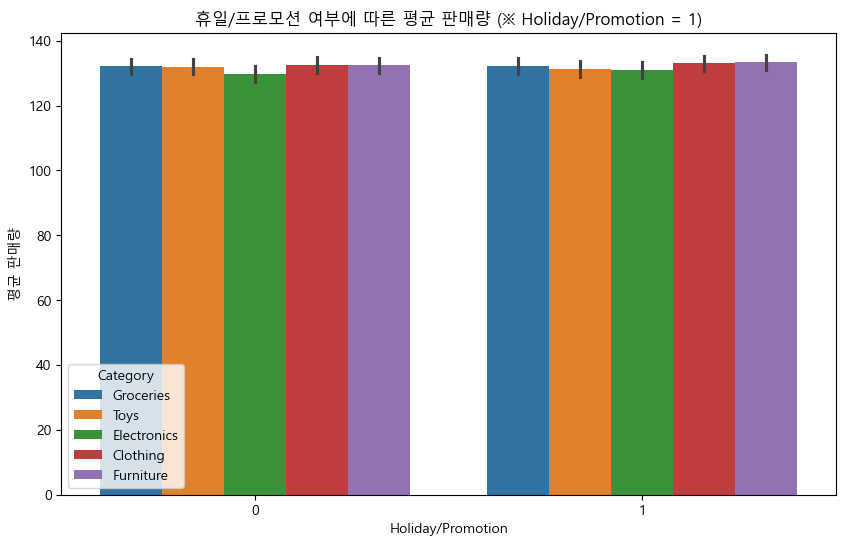

In [516]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Holiday/Promotion', y='Units Sold', estimator='mean', hue='Category')
plt.title('휴일/프로모션 여부에 따른 평균 판매량 (※ Holiday/Promotion = 1)')
plt.ylabel('평균 판매량')
plt.show()

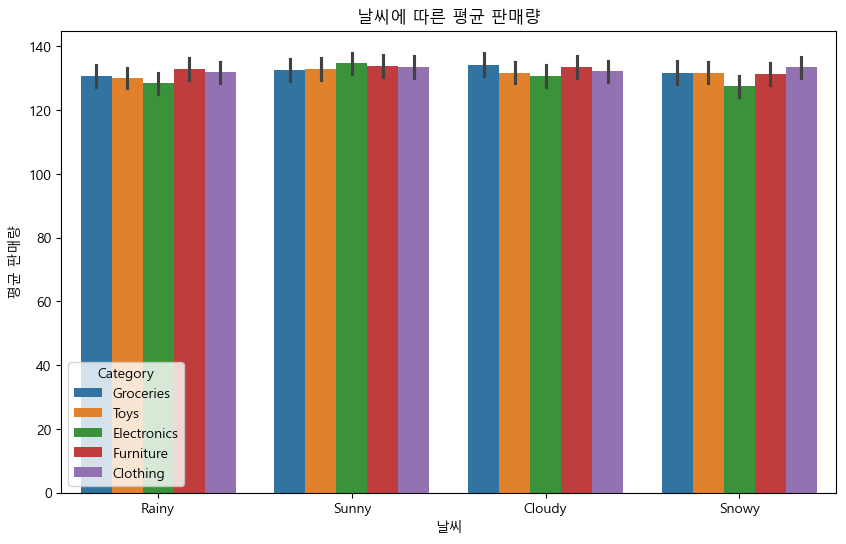

In [517]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Weather Condition', y='Units Sold', estimator='mean', hue='Category')
plt.title('날씨에 따른 평균 판매량')
plt.xlabel('날씨')
plt.ylabel('평균 판매량')
plt.show()

In [283]:
# import pandas as pd
# import numpy as np

# def sample_like_normal(df, column='Units Sold', total_target=72000, random_state=42):
#     mean = df[column].mean()
#     std = df[column].std()

#     # Z-score 구간 정의와 비율
#     z_bins = [-3, -2, -1, 0, 1, 2, 3]
#     proportions = [0.021, 0.136, 0.341, 0.341, 0.136, 0.021]  # 정규분포 비율
#     total_proportion = sum(proportions)  # 합계는 0.996

#     # 정규화 보정 (합이 1이 아니므로)
#     proportions = [p / total_proportion for p in proportions]

#     sampled_data = []

#     for i in range(len(z_bins) - 1):
#         lower_z = z_bins[i]
#         upper_z = z_bins[i + 1]

#         lower_bound = mean + lower_z * std
#         upper_bound = mean + upper_z * std

#         bin_df = df[(df[column] >= lower_bound) & (df[column] < upper_bound)]

#         target_n = int(total_target * proportions[i])
#         actual_n = min(len(bin_df), target_n)

#         if actual_n > 0:
#             sampled = bin_df.sample(n=actual_n, random_state=random_state)
#             sampled_data.append(sampled)

#         print(f"{lower_z}σ ~ {upper_z}σ: 목표 {target_n}개, 실제 {actual_n}개")

#     final_df = pd.concat(sampled_data).reset_index(drop=True)

#     print(f"\n총 샘플 수: {len(final_df)} (목표: {total_target})")
#     return final_df


In [284]:
# balanced_df = sample_like_normal(df, column='Units Sold', total_target=len(temp_df))
# balanced_df

### 피처 엔지니어링

In [518]:
final_df = df.copy()
# 상대 가격 변수
final_df['relative_price'] = round((final_df['Sale Price'] - final_df['Competitor Pricing'])/final_df['Competitor Pricing'],2)
final_df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,...,Competitor Pricing,Seasonality,Weekday,Year,Month,Day,Season,Sale Price,Product Classification,relative_price
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,...,29.69,Autumn,Saturday,2022,1,1,Winter,26.800,Groceries_P0001,-0.10
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,...,66.16,Autumn,Saturday,2022,1,1,Winter,50.408,Toys_P0002,-0.24
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,...,31.32,Summer,Saturday,2022,1,1,Winter,25.191,Toys_P0003,-0.20
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,...,34.74,Autumn,Saturday,2022,1,1,Winter,29.448,Toys_P0004,-0.15
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,...,68.95,Summer,Saturday,2022,1,1,Winter,73.640,Electronics_P0005,0.07


#### 시계열 예측의 정확도 향상을 위해 시계열 특성 추가
- 판매량의 주기성이 보이지 않으나 요일별 특성을 반영하기 위해 7일전 판매량을 특성으로 추가
- 월별로 판매량 변동이 있는 것으로 확인되므로 최근 30일 판매량 평균을 특성으로 추가함
- 카테고리별로 상점과 제품 아이디가 동일하므로 상품 분류를 위해 3개의 특성으로 그룹화함.

In [519]:
# 1일전 판매량(시계열에서 가장 강력하게 사용하는 특성)
final_df['lag_1'] = final_df.groupby(['Store ID', 'Product ID', 'Category'])['Units Sold'].shift(1)

# 7일전 판매량
final_df['lag_7'] = final_df.groupby(['Store ID', 'Product ID', 'Category'])['Units Sold'].shift(7)

# 30일 rolling 평균 (어제까지 30일간 평균)
final_df['rolling_30'] = final_df.groupby(['Store ID', 'Product ID', 'Category'])['Units Sold'].shift(1).rolling(window=30).mean()
final_df

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,...,Year,Month,Day,Season,Sale Price,Product Classification,relative_price,lag_1,lag_7,rolling_30
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,...,2022,1,1,Winter,26.800,Groceries_P0001,-0.10,NaN,NaN,NaN
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,...,2022,1,1,Winter,50.408,Toys_P0002,-0.24,NaN,NaN,NaN
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,...,2022,1,1,Winter,25.191,Toys_P0003,-0.20,NaN,NaN,NaN
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,...,2022,1,1,Winter,29.448,Toys_P0004,-0.15,NaN,NaN,NaN
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,...,2022,1,1,Winter,73.640,Electronics_P0005,0.07,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71970,2024-01-01,S005,P0016,Furniture,East,96,8,127,18.46,73.73,...,2024,1,1,Winter,58.984,Furniture_P0016,-0.19,13.0,63.0,131.300000
71971,2024-01-01,S005,P0017,Toys,North,313,51,101,48.43,82.57,...,2024,1,1,Winter,74.313,Toys_P0017,-0.11,104.0,3.0,123.000000
71972,2024-01-01,S005,P0018,Clothing,West,278,36,151,39.65,11.11,...,2024,1,1,Winter,9.999,Clothing_P0018,-0.08,111.0,265.0,124.866667
71973,2024-01-01,S005,P0019,Toys,East,374,264,21,270.52,53.14,...,2024,1,1,Winter,42.512,Toys_P0019,-0.24,17.0,27.0,118.733333


In [520]:
# NaN값 제거
final_df = final_df.dropna().reset_index(drop=True)
final_df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,...,Year,Month,Day,Season,Sale Price,Product Classification,relative_price,lag_1,lag_7,rolling_30
0,2022-01-17,S001,P0013,Toys,North,167,99,146,103.04,66.65,...,2022,1,17,Winter,53.3200,Toys_P0013,-0.20,80.0,42.0,141.033333
1,2022-01-17,S002,P0004,Groceries,West,411,368,66,371.89,17.02,...,2022,1,17,Winter,13.6160,Groceries_P0004,-0.32,105.0,88.0,132.033333
2,2022-01-17,S002,P0011,Clothing,South,387,25,56,18.41,70.44,...,2022,1,17,Winter,66.9180,Clothing_P0011,-0.01,329.0,143.0,136.566667
3,2022-01-17,S005,P0012,Groceries,North,101,36,144,30.78,82.36,...,2022,1,17,Winter,82.3600,Groceries_P0012,-0.03,49.0,171.0,121.633333
4,2022-01-18,S001,P0003,Toys,East,203,70,147,78.83,82.71,...,2022,1,18,Winter,70.3035,Toys_P0003,-0.19,61.0,65.0,149.400000


- Yeo-Johnson 변환

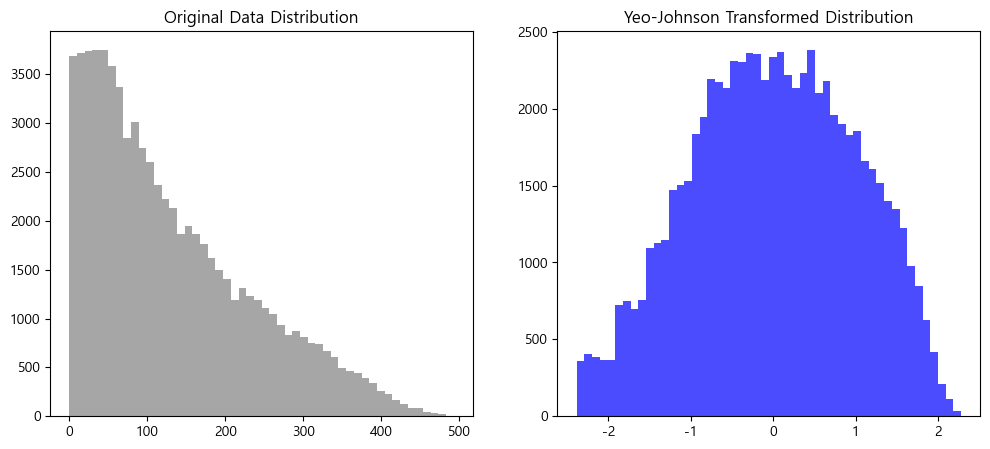

In [521]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
transformed = pt.fit_transform(df[['Units Sold']])
data = df['Units Sold'].copy()

# # 예: df['Units Sold']가 0 이상의 값만 있다고 가정

# # 1. 데이터 준비
# data = df['Units Sold'].copy()

# # 2. 0 이하 값이 있으면 작은 양수 더하기 (optional)
# if (data <= 0).any():
#     data = data + abs(data.min()) + 1

# # 3. Box-Cox 변환 수행
# data_boxcox, fitted_lambda = stats.boxcox(data)

# print(f"Optimal lambda for Box-Cox: {fitted_lambda:.4f}")

# 4. 변환 전후 히스토그램 비교
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(data, bins=50, color='gray', alpha=0.7)
plt.title('Original Data Distribution')

plt.subplot(1,2,2)
plt.hist(transformed, bins=50, color='blue', alpha=0.7)
plt.title('Yeo-Johnson Transformed Distribution')

plt.show()

In [522]:
df['Units Sold_YJ'] = transformed.flatten() # 1차원 배열로 만들기
final_df['Units Sold_YJ'] = pd.Series(transformed.flatten(), index=df.index)

In [523]:
final_df.head(2)

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,...,Month,Day,Season,Sale Price,Product Classification,relative_price,lag_1,lag_7,rolling_30,Units Sold_YJ
0,2022-01-17,S001,P0013,Toys,North,167,99,146,103.04,66.65,...,1,17,Winter,53.320,Toys_P0013,-0.20,80.0,42.0,141.033333,0.216682
1,2022-01-17,S002,P0004,Groceries,West,411,368,66,371.89,17.02,...,1,17,Winter,13.616,Groceries_P0004,-0.32,105.0,88.0,132.033333,0.416323


In [ ]:
# final_df['Log Units Sold'] = np.log1p(final_df['Units Sold'])

In [524]:
final_df.columns

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality', 'Weekday', 'Year', 'Month', 'Day',
       'Season', 'Sale Price', 'Product Classification', 'relative_price',
       'lag_1', 'lag_7', 'rolling_30', 'Units Sold_YJ'],
      dtype='object')

In [525]:
filtered_df= final_df[['Date', 'Year', 'Month', 'Day', 'Product Classification', 'Category', 'Region',
                       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
                       'Competitor Pricing', 'Weekday', 'Season', 'Sale Price',
                       'relative_price', 'lag_1', 'lag_7', 'rolling_30', 'Units Sold_YJ']]

In [526]:
filtered_df.to_csv('./archive/retail_store_inventory_modify.csv') # 모델 학습 전 데이터 저장

In [527]:
filtered_df = pd.read_csv('./archive/retail_store_inventory_modify.csv', index_col=0)
filtered_df.head()

,Date,Year,Month,Day,Product Classification,Category,Region,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Weekday,Season,Sale Price,relative_price,lag_1,lag_7,rolling_30,Units Sold_YJ
0,2022-01-17,2022,1,17,Toys_P0013,Toys,North,66.65,20,Sunny,1,66.90,Monday,Winter,53.3200,-0.20,80.0,42.0,141.033333,0.216682
1,2022-01-17,2022,1,17,Groceries_P0004,Groceries,West,17.02,20,Snowy,0,20.09,Monday,Winter,13.6160,-0.32,105.0,88.0,132.033333,0.416323
2,2022-01-17,2022,1,17,Clothing_P0011,Clothing,South,70.44,5,Rainy,0,67.66,Monday,Winter,66.9180,-0.01,329.0,143.0,136.566667,-0.469258
3,2022-01-17,2022,1,17,Groceries_P0012,Groceries,North,82.36,0,Snowy,1,85.31,Monday,Winter,82.3600,-0.03,49.0,171.0,121.633333,-0.525560
4,2022-01-18,2022,1,18,Toys_P0003,Toys,East,82.71,15,Sunny,0,86.78,Tuesday,Winter,70.3035,-0.19,61.0,65.0,149.400000,-1.502766


In [528]:
last_df = filtered_df.drop(columns='Date')
last_df.head()

,Year,Month,Day,Product Classification,Category,Region,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Weekday,Season,Sale Price,relative_price,lag_1,lag_7,rolling_30,Units Sold_YJ
0,2022,1,17,Toys_P0013,Toys,North,66.65,20,Sunny,1,66.90,Monday,Winter,53.3200,-0.20,80.0,42.0,141.033333,0.216682
1,2022,1,17,Groceries_P0004,Groceries,West,17.02,20,Snowy,0,20.09,Monday,Winter,13.6160,-0.32,105.0,88.0,132.033333,0.416323
2,2022,1,17,Clothing_P0011,Clothing,South,70.44,5,Rainy,0,67.66,Monday,Winter,66.9180,-0.01,329.0,143.0,136.566667,-0.469258
3,2022,1,17,Groceries_P0012,Groceries,North,82.36,0,Snowy,1,85.31,Monday,Winter,82.3600,-0.03,49.0,171.0,121.633333,-0.525560
4,2022,1,18,Toys_P0003,Toys,East,82.71,15,Sunny,0,86.78,Tuesday,Winter,70.3035,-0.19,61.0,65.0,149.400000,-1.502766


#### 인코딩

In [623]:
from sklearn.preprocessing import LabelEncoder

label_df = last_df.copy()
object_cols = label_df.select_dtypes(include='object').columns

# 각 열에 대해 라벨 인코딩 적용
encoders = {}  # 컬럼별 LabelEncoder 저장 딕셔너리
for col in object_cols:
    le = LabelEncoder()
    label_df[col] = le.fit_transform(label_df[col])
    encoders[col] = le

label_df

,Year,Month,Day,Product Classification,Category,Region,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Weekday,Season,Sale Price,relative_price,lag_1,lag_7,rolling_30,Units Sold_YJ
0,2022,1,17,92,4,1,66.65,20,3,1,66.90,1,3,53.3200,-0.20,80.0,42.0,141.033333,0.216682
1,2022,1,17,63,3,3,17.02,20,2,0,20.09,1,3,13.6160,-0.32,105.0,88.0,132.033333,0.416323
2,2022,1,17,10,0,2,70.44,5,1,0,67.66,1,3,66.9180,-0.01,329.0,143.0,136.566667,-0.469258
3,2022,1,17,71,3,1,82.36,0,2,1,85.31,1,3,82.3600,-0.03,49.0,171.0,121.633333,-0.525560
4,2022,1,18,82,4,0,82.71,15,3,0,86.78,5,3,70.3035,-0.19,61.0,65.0,149.400000,-1.502766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68420,2024,1,1,55,2,0,73.73,20,2,0,72.45,1,3,58.9840,-0.19,13.0,63.0,131.300000,0.160983
68421,2024,1,1,96,4,1,82.57,10,0,0,83.78,1,3,74.3130,-0.11,104.0,3.0,123.000000,-1.090474
68422,2024,1,1,17,0,3,11.11,10,1,0,10.91,1,3,9.9990,-0.08,111.0,265.0,124.866667,1.933514
68423,2024,1,1,98,4,0,53.14,20,1,0,55.80,1,3,42.5120,-0.24,17.0,27.0,118.733333,-1.744408


In [624]:
encoders

{'Product Classification': LabelEncoder(),
 'Category': LabelEncoder(),
 'Region': LabelEncoder(),
 'Weather Condition': LabelEncoder(),
 'Weekday': LabelEncoder(),
 'Season': LabelEncoder()}

In [123]:
# from sklearn.preprocessing import OneHotEncoder

# ohe = OneHotEncoder(sparse_output=False)

# object_cols = filtered_df.select_dtypes(include='object').columns.to_list()
# ohe_array = ohe.fit_transform(filtered_df[object_cols])
# ohe_df = pd.DataFrame(ohe_array, columns=ohe.get_feature_names_out(object_cols))
# ohe_df

In [124]:
# ohe_df.columns.to_list()[0].split('_', 1)[1]

In [125]:
# new_cols = []
# for c in ohe_df.columns.to_list():
#     new_cols.append(c.split('_', 1)[1])

# ohe_df.columns = new_cols
# ohe_df

In [126]:
# from sklearn.preprocessing import StandardScaler

# numeric_cols = ['Price', 'Discount', 'Competitor Pricing',
#                 'Sale Price', 'relative_price', 'lag_1', 'lag_7', 'rolling_30']

# scaler = StandardScaler()
# scaled_array = scaler.fit_transform(filtered_df[numeric_cols])
# scaled_df = pd.DataFrame(scaled_array, columns=numeric_cols, index=filtered_df.index)
# scaled_df


In [127]:
# encoded_df = pd.concat([scaled_df, ohe_df], axis=1)
# encoded_df = pd.concat([encoded_df, filtered_df['Units Sold']], axis=1)
# encoded_df

In [128]:
# encoded_df.columns

#### 상관 관계 확인
- 판매량과 각 변수간의 선형성은 보이지 않는다

In [151]:
# corr_matrix = encoded_df.corr()

In [152]:
# views_corr = corr_matrix['Units Sold'].abs().sort_values(ascending=False)
# top20_columns = views_corr.index[:20]
# len(top20_columns), top20_columns

In [153]:
# top20_corr = corr_matrix.loc[top20_columns, top20_columns]
# top20_corr['Units Sold']

In [154]:
# plt.figure(figsize=(10,8))
# sns.heatmap(top20_corr, annot=True, fmt=".2f", cmap='coolwarm')
# plt.title('특성 상관관계')
# plt.show()

### 모델 학습
- 특성과 타겟과의 선형성이 보이지 않으므로 비선형 효과를 반영하는 XGBoost/LightGBM 사용
- LightGBM: 속도와 메모리 효율 장점
- XGBoost: 정확도 장점

In [625]:
label_df['quantity_bin'], bin_edges = pd.qcut(label_df['Units Sold_YJ'], q=10, retbins=True, labels=False, duplicates='drop')

# 각 구간별 비율 확인
bin_counts = label_df['quantity_bin'].value_counts(normalize=True).sort_index()
print("구간별 비율:\n", bin_counts)

구간별 비율:
 quantity_bin
0    0.102959
1    0.098663
2    0.102565
3    0.099744
4    0.097333
5    0.101469
6    0.098590
7    0.099174
8    0.100402
9    0.099101
Name: proportion, dtype: float64


In [626]:
# 각 구간의 비율에 반비례하는 weight 계산 (희귀할수록 높은 가중치)
weight_map = 1 / bin_counts
label_df['sample_weight'] = label_df['quantity_bin'].map(weight_map)
label_df['sample_weight']

0         9.855250
1        10.143048
2        10.025641
3        10.025641
4         9.712562
           ...    
68420     9.855250
68421    10.135535
68422    10.090695
68423     9.712562
68424    10.090695
Name: sample_weight, Length: 68425, dtype: float64

In [627]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = label_df.drop(columns=['Units Sold_YJ', 'sample_weight', 'quantity_bin'])  # 설명 변수
y = label_df['Units Sold_YJ']                 # 타겟 변수
weights = label_df['sample_weight']


# 1차: train / temp (train 70%, temp 30%)
X_train, X_temp, y_train, y_temp, w_train, w_valid = train_test_split(
    X, y, weights, test_size=0.3, random_state=13
)

# 2차: temp → valid / test (valid 15%, test 15%)
X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=15
)

# LightGBM 데이터셋 생성
train_data = lgb.Dataset(X_train, label=y_train, weight=w_train)
valid_data = lgb.Dataset(X_valid, label=y_valid)
test_data = lgb.Dataset(X_test, label=y_test)

# 파라미터 설정
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 30,
    'feature_fraction': 0.8, # 학습시 무작위로 일부 피처만 사용
    'bagging_fraction': 0.8, # 일부 데이터 샘플링
    'bagging_freq': 5, # bagging_fraction 적용 주기
    'verbose': -1
}

# 모델 학습
model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, valid_data],
    num_boost_round=1000,
    callbacks=[
        lgb.early_stopping(50),        # early stopping
        lgb.log_evaluation(100)        # 100번마다 로그 출력
    ]
)

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[43]	training's rmse: 0.988776	valid_1's rmse: 0.998211


In [628]:
y_pred = model.predict(X_test)

In [629]:
# 평가
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')

RMSE: 1.00


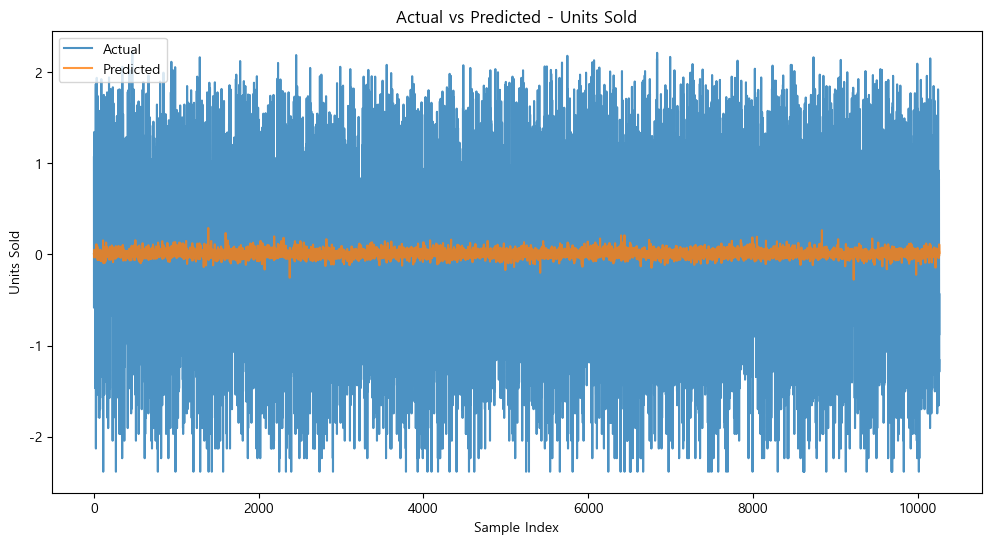

In [630]:
# 예측 결과 시각화
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual", alpha=0.8)
plt.plot(y_pred, label="Predicted", alpha=0.8)
plt.legend()
plt.title("Actual vs Predicted - Units Sold")
plt.xlabel("Sample Index")
plt.ylabel("Units Sold")
plt.show()

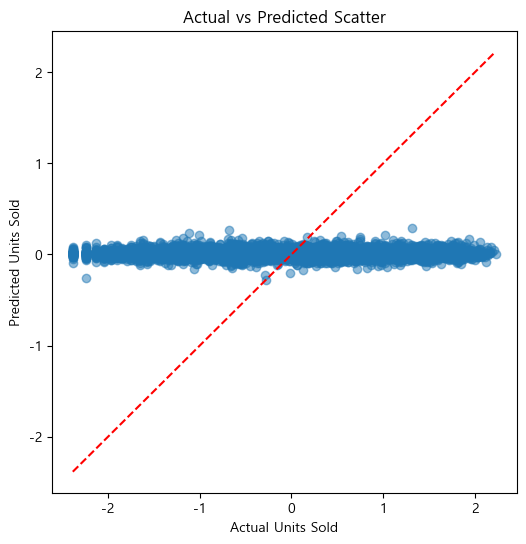

In [632]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # y=x 기준선
plt.xlabel("Actual Units Sold")
plt.ylabel("Predicted Units Sold")
plt.title("Actual vs Predicted Scatter")
plt.show()

- 변수 중요도

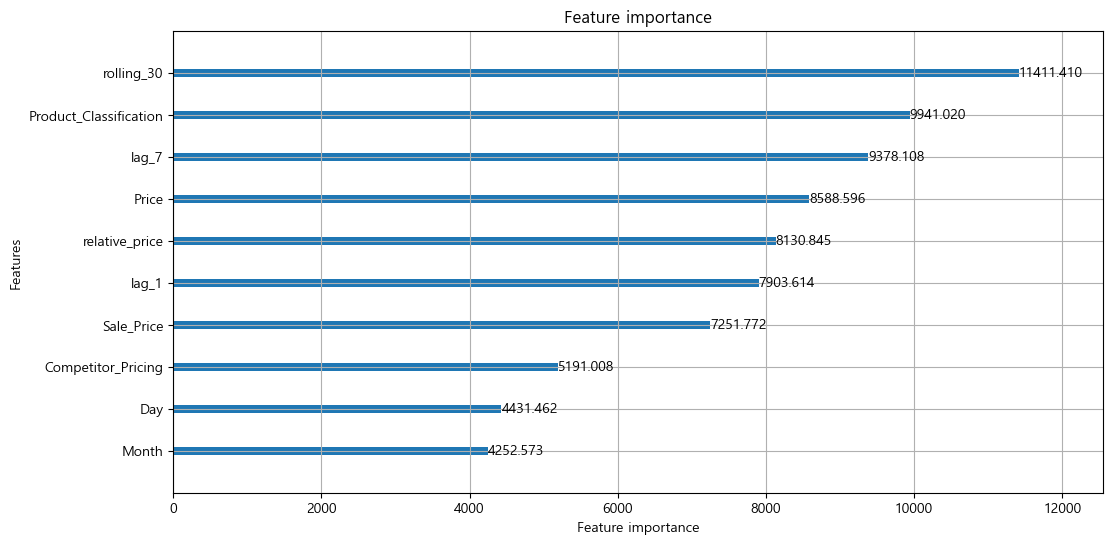

In [637]:
# importance_type='split': 7이면 7번의 트리 분할에서 중요한 역할을 함.
# importance_type='gain': 피처가 감소시킨 손실의 합.
lgb.plot_importance(model, max_num_features=10, importance_type='gain', figsize=(12,6)) 
plt.show()

#### XGBoost

In [638]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

label_df = last_df.copy()
object_cols = label_df.select_dtypes(include='object').columns

# 각 열에 대해 라벨 인코딩 적용
encoders = {}  # 컬럼별 LabelEncoder 저장 딕셔너리
for col in object_cols:
    le = LabelEncoder()
    label_df[col] = le.fit_transform(label_df[col])
    encoders[col] = le

label_df

,Year,Month,Day,Product Classification,Category,Region,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Weekday,Season,Sale Price,relative_price,lag_1,lag_7,rolling_30,Units Sold_YJ
0,2022,1,17,92,4,1,66.65,20,3,1,66.90,1,3,53.3200,-0.20,80.0,42.0,141.033333,0.216682
1,2022,1,17,63,3,3,17.02,20,2,0,20.09,1,3,13.6160,-0.32,105.0,88.0,132.033333,0.416323
2,2022,1,17,10,0,2,70.44,5,1,0,67.66,1,3,66.9180,-0.01,329.0,143.0,136.566667,-0.469258
3,2022,1,17,71,3,1,82.36,0,2,1,85.31,1,3,82.3600,-0.03,49.0,171.0,121.633333,-0.525560
4,2022,1,18,82,4,0,82.71,15,3,0,86.78,5,3,70.3035,-0.19,61.0,65.0,149.400000,-1.502766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68420,2024,1,1,55,2,0,73.73,20,2,0,72.45,1,3,58.9840,-0.19,13.0,63.0,131.300000,0.160983
68421,2024,1,1,96,4,1,82.57,10,0,0,83.78,1,3,74.3130,-0.11,104.0,3.0,123.000000,-1.090474
68422,2024,1,1,17,0,3,11.11,10,1,0,10.91,1,3,9.9990,-0.08,111.0,265.0,124.866667,1.933514
68423,2024,1,1,98,4,0,53.14,20,1,0,55.80,1,3,42.5120,-0.24,17.0,27.0,118.733333,-1.744408


In [639]:
import xgboost
from xgboost import plot_importance, XGBRegressor

X = label_df.drop(columns=['Units Sold_YJ'])  # 설명 변수
y = label_df['Units Sold_YJ']                 # 타겟 변수


# 1차: train / temp (train 70%, temp 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

xgb_model = xgboost.XGBRegressor(n_estimators=300, # 트리 개수
                                 learning_rate=0.02,
                                 gamma=0,
                                 subsample=0.75,
                                 colsample_bytree=1,
                                 max_depth=8)


xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.02, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [640]:
y_pred = xgb_model.predict(X_test)
y_pred

array([ 0.08695313,  0.24704427,  0.03012916, ...,  0.08961796,
        0.13532852, -0.07074177], dtype=float32)

In [641]:
# 평가
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')

RMSE: 1.00


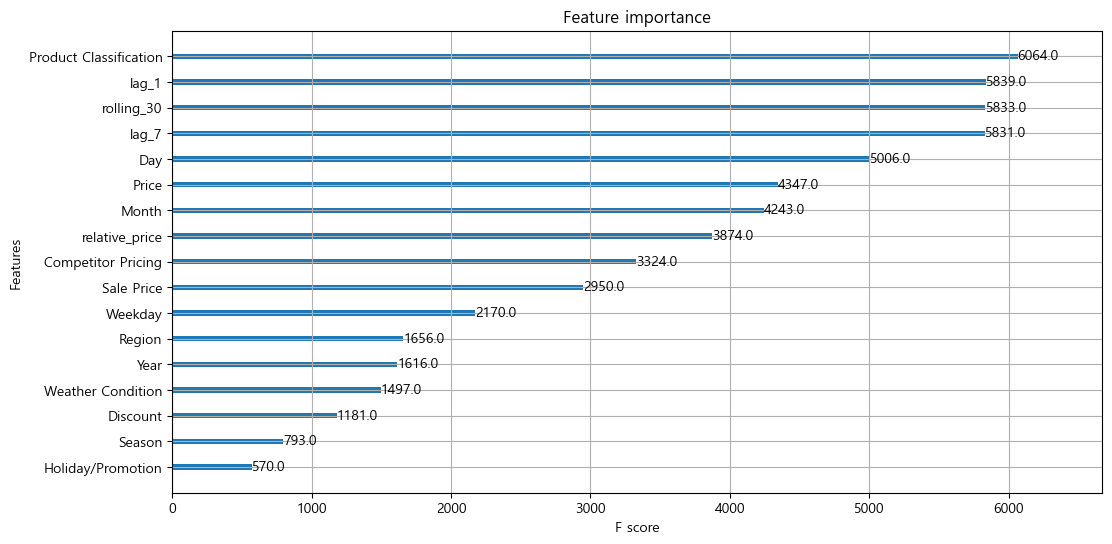

In [649]:
fig, ax = plt.subplots(figsize=(12, 6))  # 원하는 크기로 지정
plot_importance(xgb_model, importance_type='weight', ax=ax)
plt.show()

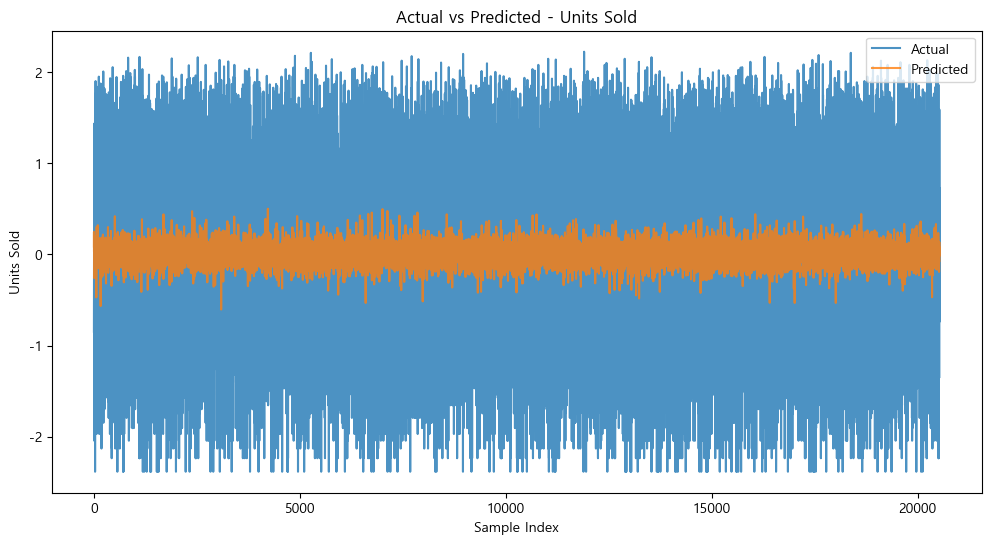

In [605]:
# 예측 결과 시각화
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual", alpha=0.8)
plt.plot(y_pred, label="Predicted", alpha=0.8)
plt.legend()
plt.title("Actual vs Predicted - Units Sold")
plt.xlabel("Sample Index")
plt.ylabel("Units Sold")
plt.show()

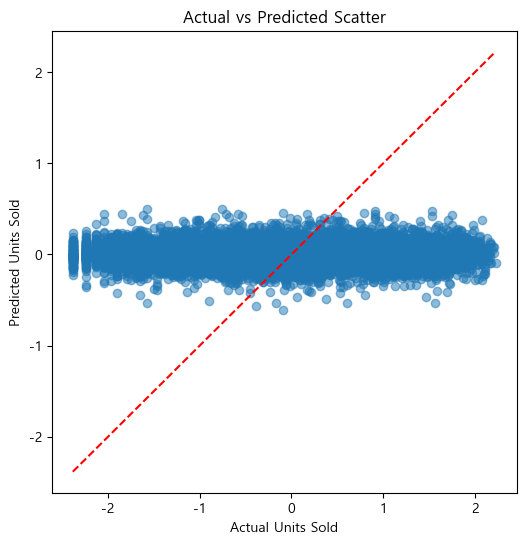

In [606]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # y=x 기준선
plt.xlabel("Actual Units Sold")
plt.ylabel("Predicted Units Sold")
plt.title("Actual vs Predicted Scatter")
plt.show()

### 가격 최적화

In [607]:
X_test.iloc[0]

Year                      2022.000
Month                       10.000
Day                         22.000
Product Classification      81.000
Category                     4.000
Region                       0.000
Price                       94.560
Discount                    20.000
Weather Condition            1.000
Holiday/Promotion            1.000
Competitor Pricing          98.060
Weekday                      2.000
Season                       0.000
Sale Price                  75.648
relative_price              -0.230
lag_1                      239.000
lag_7                      204.000
rolling_30                 163.300
Name: 25432, dtype: float64

In [608]:
X_test.iloc[0]['Product Classification']

81.0

In [609]:
le = encoders['Product Classification']
val = int(X_test.iloc[0]['Product Classification'])
decoded_val = le.inverse_transform([val])[0]
decoded_val

'Toys_P0002'

In [610]:
avg_price = filtered_df[filtered_df['Product Classification'] == decoded_val]['Sale Price'].mean()
np.round(np.arange(avg_price*0.8, avg_price*1.2+1, avg_price*0.02), 2)

array([40.48, 41.49, 42.5 , 43.51, 44.52, 45.54, 46.55, 47.56, 48.57,
       49.58, 50.59, 51.61, 52.62, 53.63, 54.64, 55.65, 56.67, 57.68,
       58.69, 59.7 , 60.71])

In [611]:
def generate_scenarios(base_row, competitor_pricing):

    # 라벨 인코딩된 값 다시 되돌리기
    le = encoders['Product Classification']
    val = int(base_row['Product Classification'])
    decoded_val = le.inverse_transform([val])[0]

    # 해당 제품의 평균 가격으로부터 후보 가격을 뽑아냄
    avg_price = filtered_df[filtered_df['Product Classification'] == decoded_val]['Sale Price'].mean()
    candidate_prices = np.round(np.arange(avg_price*0.8, avg_price*1.2+1, avg_price*0.02), 2)

    row = []
    for p in candidate_prices:
        r = base_row.copy()
        r['Sale Price'] = p

        r['Discount'] = (r['Price']-p) /r['Price']
        r['Competitor Pricing'] = competitor_pricing

        # 경쟁사 가격은 외부 시스템에 의해 자동으로 수집하고 입력된다고 가정함.
        r['relative_price'] = (p - r['Competitor Pricing'])/r['Competitor Pricing']
        row.append(r)
    return pd.DataFrame(row)


In [612]:
# 경쟁사 가격 임의 지정
competitor_pricing = 27.250000

# 고객 입력 대신 test 데이터 중 한개 사용
base_row = X_test.iloc[0]

scenario_df = generate_scenarios(base_row, competitor_pricing)

In [613]:
scenario_df

,Year,Month,Day,Product Classification,Category,Region,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Weekday,Season,Sale Price,relative_price,lag_1,lag_7,rolling_30
25432,2022.0,10.0,22.0,81.0,4.0,0.0,94.56,0.571912,1.0,1.0,27.25,2.0,0.0,40.48,0.485505,239.0,204.0,163.3
25432,2022.0,10.0,22.0,81.0,4.0,0.0,94.56,0.561231,1.0,1.0,27.25,2.0,0.0,41.49,0.522569,239.0,204.0,163.3
25432,2022.0,10.0,22.0,81.0,4.0,0.0,94.56,0.550550,1.0,1.0,27.25,2.0,0.0,42.50,0.559633,239.0,204.0,163.3
25432,2022.0,10.0,22.0,81.0,4.0,0.0,94.56,0.539869,1.0,1.0,27.25,2.0,0.0,43.51,0.596697,239.0,204.0,163.3
25432,2022.0,10.0,22.0,81.0,4.0,0.0,94.56,0.529188,1.0,1.0,27.25,2.0,0.0,44.52,0.633761,239.0,204.0,163.3
25432,2022.0,10.0,22.0,81.0,4.0,0.0,94.56,0.518401,1.0,1.0,27.25,2.0,0.0,45.54,0.671193,239.0,204.0,163.3
25432,2022.0,10.0,22.0,81.0,4.0,0.0,94.56,0.507720,1.0,1.0,27.25,2.0,0.0,46.55,0.708257,239.0,204.0,163.3
25432,2022.0,10.0,22.0,81.0,4.0,0.0,94.56,0.497039,1.0,1.0,27.25,2.0,0.0,47.56,0.745321,239.0,204.0,163.3
25432,2022.0,10.0,22.0,81.0,4.0,0.0,94.56,0.486358,1.0,1.0,27.25,2.0,0.0,48.57,0.782385,239.0,204.0,163.3
25432,2022.0,10.0,22.0,81.0,4.0,0.0,94.56,0.475677,1.0,1.0,27.25,2.0,0.0,49.58,0.819450,239.0,204.0,163.3


In [614]:
pred_quantity = xgb_model.predict(scenario_df)

In [615]:
pred_quantity

array([-0.13097315, -0.03684079, -0.01049866, -0.1049113 ,  0.06002308,
        0.07685834,  0.08391667,  0.08391667,  0.08391667,  0.01223969,
       -0.01848665, -0.01270754, -0.01631209, -0.04816117, -0.04937803,
       -0.05100192, -0.05100192, -0.05100192, -0.05100192, -0.05100192,
       -0.0643577 ], dtype=float32)

In [616]:
# np.expm1(pred_quantity)

In [617]:
# result = np.round(scenario_df['Sale Price'] * np.expm1(pred_quantity), 1)
pred_quantity_original = pt.inverse_transform(pred_quantity.reshape(-1, 1)).flatten()
result = np.round(scenario_df['Sale Price'] * pred_quantity_original,1)
max_pos = np.argmax(result)
max_pos

c:\Users\Paris\miniconda3\envs\ds_study\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


20

#### 최종 시나리오

In [618]:
filtered_df.head(2)

,Date,Year,Month,Day,Product Classification,Category,Region,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Weekday,Season,Sale Price,relative_price,lag_1,lag_7,rolling_30,Units Sold_YJ
0,2022-01-17,2022,1,17,Toys_P0013,Toys,North,66.65,20,Sunny,1,66.90,Monday,Winter,53.320,-0.20,80.0,42.0,141.033333,0.216682
1,2022-01-17,2022,1,17,Groceries_P0004,Groceries,West,17.02,20,Snowy,0,20.09,Monday,Winter,13.616,-0.32,105.0,88.0,132.033333,0.416323


In [619]:
X_test.iloc[0]

Year                      2022.000
Month                       10.000
Day                         22.000
Product Classification      81.000
Category                     4.000
Region                       0.000
Price                       94.560
Discount                    20.000
Weather Condition            1.000
Holiday/Promotion            1.000
Competitor Pricing          98.060
Weekday                      2.000
Season                       0.000
Sale Price                  75.648
relative_price              -0.230
lag_1                      239.000
lag_7                      204.000
rolling_30                 163.300
Name: 25432, dtype: float64

In [620]:
from datetime import datetime, timedelta

# 제품 라벨된 값 원래대로 변환
le = encoders['Product Classification']
val = int(base_row['Product Classification'])
decoded_val = le.inverse_transform([val])[0]

# X_test 기준 날짜 만들기
current_date = datetime(
    int(X_test.iloc[0]['Year']),
    int(X_test.iloc[0]['Month']),
    int(X_test.iloc[0]['Day'])
)

# 3개월 전 날짜 계산
three_months_ago = current_date - pd.DateOffset(months=3)

# filtered_df['Date']: 날짜형식 아닌경우 대비 
filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])

# 해당 제품의 평균 가격으로부터 후보 가격을 뽑아냄
avg_price = filtered_df.loc[(filtered_df['Product Classification'] == decoded_val)&
                            (filtered_df['Date'] >= three_months_ago)&
                            (filtered_df['Date'] <= current_date), 'Sale Price'].mean()
scenario_df.iloc[max_pos]['Sale Price']

60.71

In [621]:
def recommend_price(origin_df, base_row, competitor_pricing):
    scenario_df = generate_scenarios(base_row, competitor_pricing)

    le = encoders['Product Classification']
    val = int(base_row['Product Classification'])
    decoded_val = le.inverse_transform([val])[0]

    # X_test 기준 날짜 만들기
    current_date = datetime(
        int(base_row['Year']),
        int(base_row['Month']),
        int(base_row['Day'])
    )

    # 3개월 전 날짜 계산
    three_months_ago = current_date - pd.DateOffset(months=3)

    # filtered_df['Date']: 날짜형식 아닌경우 대비 
    origin_df['Date'] = pd.to_datetime(filtered_df['Date'])

    # 해당 제품의 평균 가격으로부터 후보 가격을 뽑아냄
    avg_price = origin_df.loc[(origin_df['Product Classification'] == decoded_val)&
                                (origin_df['Date'] >= three_months_ago)&
                                (origin_df['Date'] <= current_date), 'Sale Price'].mean()

    result = np.round(scenario_df['Sale Price'] * np.expm1(pred_quantity), 1)
    max_pos = np.argmax(result)
    recommend_price = scenario_df.iloc[max_pos]['Sale Price']

    return print(f'3개월 평균 판매 가격은 {round(avg_price, 2)} 달러에요 🤩\n분석 결과 최적 매출을 위한 추천 판매 가격은 {recommend_price} 달러입니다🚀')

In [622]:
# 경쟁사 가격 임의 지정
competitor_pricing = 27.250000

# 고객 입력 대신 test 데이터 중 한개 사용
base_row = X_test.iloc[0]

# 원본 데이터는 제품 구분 컬럼이 없어 filtered_df 데이터셋 사용
recommend_price(filtered_df, base_row, competitor_pricing)

3개월 평균 판매 가격은 49.35 달러에요 🤩
분석 결과 최적 매출을 위한 추천 판매 가격은 48.57 달러입니다🚀
